In [ ]:
# Cryptocurrency Arbitrage Finding Mismatched Prices

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import datetime

In [2]:
def cryptoArbitrage(symbol, comparison_symbol=['USD']):
    url = 'https://api.cryptonator.com/api/full/{}-{}'\
            .format(symbol.upper(), ','.join(comparison_symbol).upper())
    page = requests.get(url)
    data = page.json()['ticker']['markets']
    df= pd.DataFrame(data)
    return df

In [7]:

def graph(symbol, comparison_symbol):
    data= cryptoArbitrage(symbol, comparison_symbol = ['USD'])
    
    price = data.price
    volume= data.volume
    market= data.market
    plt.figure(figsize=(20,10))
    for market, x,y in zip(market, price, volume):
        plt.annotate(market, xy=(x, y), xytext=(-5, 5), textcoords='offset points', fontsize=20)
    plt.scatter(data.price,data.volume)
    plt.title(symbol + ' Arbitrage Finder', fontsize=30)
    plt.ylabel('Volumes', fontsize = 30)
    plt.xlabel('Prices', fontsize = 30)
    plt.show()
   
    max = float(np.max(price))
    min = float(np.min(price))
    d= max - min
    
    print("Market "+ market[np.argmin(price)]+  " has lowest "+ symbol+ " price " +str(min)+"$")
    print("Market", market[np.argmax(price)],  " has higest ", symbol, " price "+str(max)+"$")
        
    print("The arbitage you will get if you purchase from", market[np.argmin(price)],"& sell in",market[np.argmax(price)]," is USD ",d,"$")

   
    
    
    

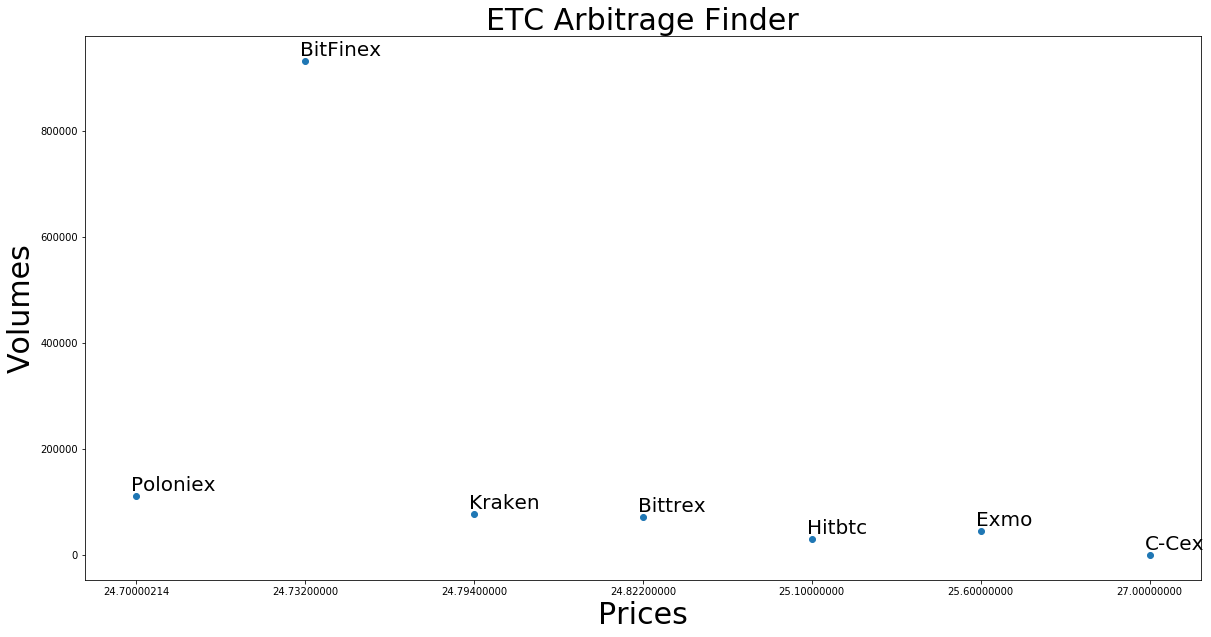

Market e has lowest ETC price 24.70000214$
Market l  has higest  ETC  price 27.0$
The arbitage you will get if you purchase from e & sell in l  is USD  2.2999978600000013 $


In [8]:
graph('ETC', 'USD')